# 2D Count plot example

## Preamble

Plotting the number of items per category is trivial in pandas and seaborn, using sns.countplot(). But there have been times where I have wanted to plot the quantities of items over two variables. I came up with an original method, but then I found out the magic of pivot tables, and it is now so easy!

## Method

Import relevant libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Set seaborn and matplotlib parameters to make the figure look nice and pretty. You can do what you want here.

In [3]:
sns.set_context('notebook')
sns.set(color_codes=True)
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette('bright')
from matplotlib import rcParams
rcParams['figure.figsize'] = [10.0,8.0]

Import the "penguins" data set, removing the missing data for purposes of this demonstration

In [4]:
df = sns.load_dataset('penguins').dropna()

Sort two categorical axes

In [5]:
species = df["species"].sort_values().unique()
islands = df["island"].sort_values().unique()

Construct the 2D map as a data frame, then plot in a heatmap

Text(0.5, 1.0, 'Penguins')

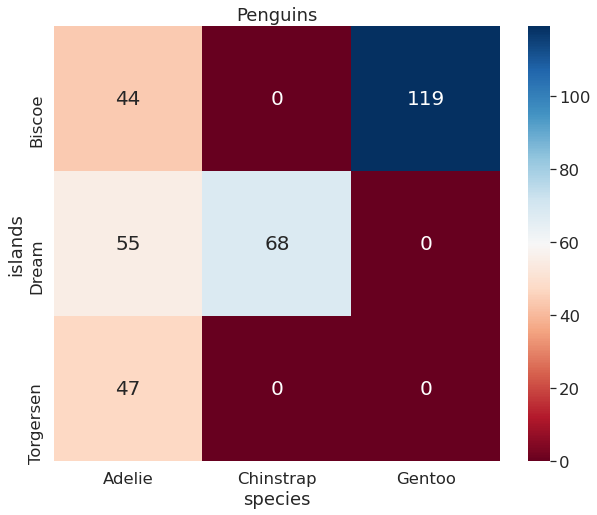

In [6]:
count_df = pd.DataFrame()

for island in islands:
    data = df[df["island"]==island]
    
    for i,s in enumerate(species):
        data_s = data[data["species"]==s]
        count_df.loc[island,s] = data_s.index.size
        
ax = sns.heatmap(count_df,annot=True,fmt='.0f',cmap="RdBu",annot_kws={'size':20})
ax.set_xlabel("species")
ax.set_ylabel("islands")
ax.set_title("Penguins")

Can also generate multiple maps if there is a third variable, such as in this case, sex.

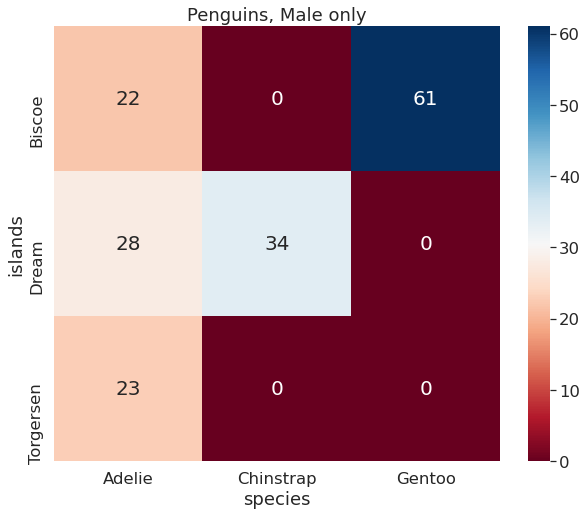

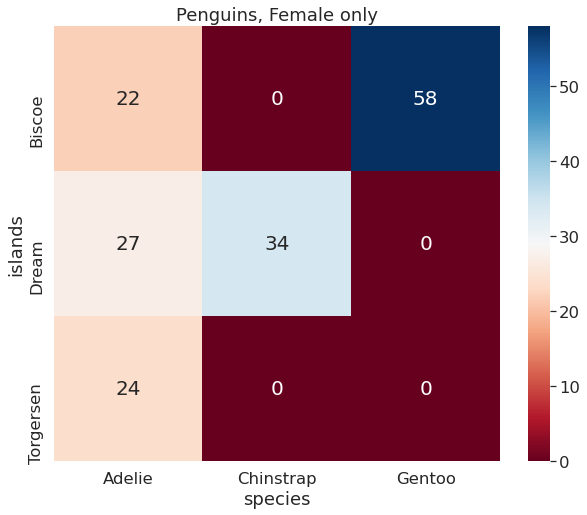

In [16]:
for sex in ["MALE","FEMALE"]: 
    plt.figure()
    count_df = pd.DataFrame()

    for island in islands:
        data = df[(df["island"]==island)&(df["sex"]==sex)]

        for i,s in enumerate(species):
            data_s = data[data["species"]==s]
            count_df.loc[island,s] = data_s.index.size

    ax = sns.heatmap(count_df,annot=True,fmt='.0f',cmap="RdBu",annot_kws={'size':20})
    ax.set_xlabel("species")
    ax.set_ylabel("islands")
    ax.set_title("Penguins, {} only".format(sex.capitalize()))

UPDATE: This is much easier with pivot tables

Text(61.5, 0.5, 'islands')

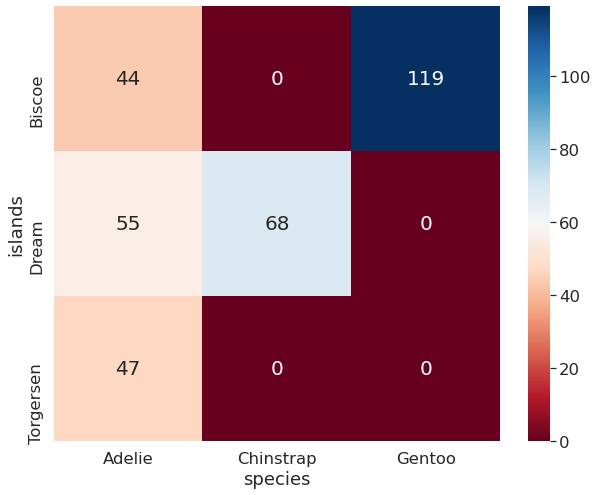

In [7]:
count_df = df.pivot_table(values='body_mass_g',index="island",columns='species',aggfunc=len,fill_value=0)

ax = sns.heatmap(count_df,annot=True,fmt='.0f',cmap="RdBu",annot_kws={'size':20})
ax.set_xlabel("species")
ax.set_ylabel("islands")

ax.set_title("Penguins")